$$
\textbf{CIR Process Dynamics:} \quad dv(t) = \kappa\left(\theta - v(t)\right)dt + \sigma\sqrt{v(t)}\,dW_t,
$$

$$
\text{with initial value } v(0) = v_0.
$$

$$
\textbf{Exact Discretization:}
$$

For a time step \(\Delta t\), compute:

$$
c = \frac{\sigma^2\left(1 - e^{-\kappa \Delta t}\right)}{4\kappa},
$$

$$
d = \frac{4\kappa\theta}{\sigma^2},
$$

$$
\lambda = \frac{4\kappa\, e^{-\kappa \Delta t} \, v(t)}{\sigma^2\left(1 - e^{-\kappa \Delta t}\right)}.
$$

Then update the variance as:

$$
v(t+\Delta t) = c\cdot X, \quad \text{with} \quad X \sim \chi'^2_d(\lambda).
$$

$$
\textbf{Simulation Overview:}
$$

- Simulate \(N+1\) steps over time horizon \( T \) with \( \Delta t = \frac{T}{N} \).
- Repeat the process for a number of sample paths.
- Plot the resulting paths to visualize the evolution of \( v(t) \) under the Heston model.


Feller condition (2 * kappa * theta > sigma^2): True


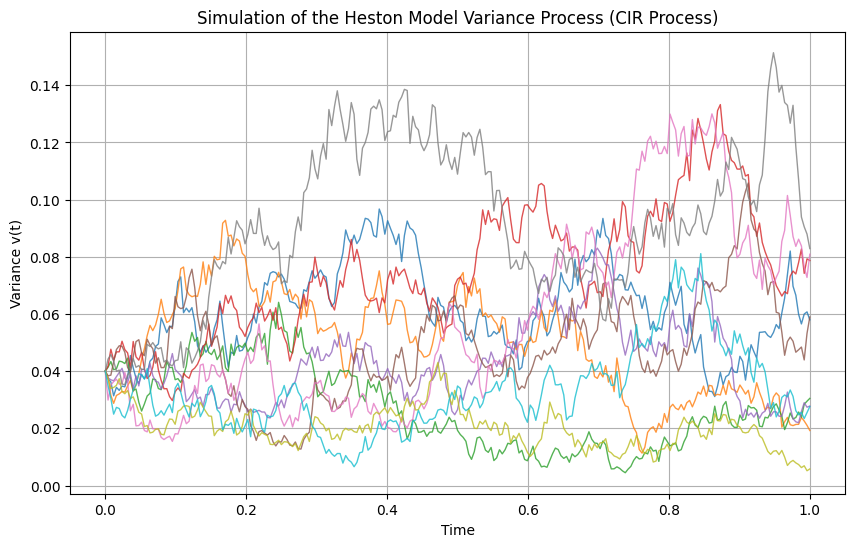

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2

# Parameters for the CIR process (variance process in Heston model)
kappa = 1.5   # mean-reversion rate
theta = 0.04  # long-run variance
sigma = 0.3   # volatility of volatility
v0 = 0.04     # initial variance
T = 1.0       # time horizon (e.g., 1 year)
N = 252       # steps (daily)
dt = T / N

# Number of sample paths to simulate
num_paths = 10

# Time grid for plotting
t = np.linspace(0, T, N + 1)

def simulate_CIR_path(v0, kappa, theta, sigma, dt, N):
    """Simulate a single path of the CIR process using exact discretization."""
    vs = np.empty(N + 1)
    vs[0] = v0
    for i in range(1, N + 1):
        # Exact discretization parameters
        c = (sigma**2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        d = 4 * kappa * theta / sigma**2
        lambda_param = (4 * kappa * np.exp(-kappa * dt) * vs[i - 1]) / (sigma**2 * (1 - np.exp(-kappa * dt)))
        
        # Sample from the noncentral chi-square distribution
        ncx2_sample = ncx2.rvs(d, lambda_param)
        vs[i] = c * ncx2_sample
    return vs

# Check the Feller condition for the CIR process
feller_condition = 2 * kappa * theta > sigma**2
print(f"Feller condition (2 * kappa * theta > sigma^2): {feller_condition}")

# Plot sample paths of the variance process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    path = simulate_CIR_path(v0, kappa, theta, sigma, dt, N)
    plt.plot(t, path, lw=1, alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Variance v(t)')
plt.title('Simulation of the Heston Model Variance Process (CIR Process)')
plt.grid(True)
plt.show()
